In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_excel('Train.xlsx')
df.head()

,AT,V,AP,RH,PE
0,10.54,34.03,1018.71,74.00,478.77
1,7.08,39.99,1010.55,91.44,482.83
2,14.49,41.16,1000.50,82.17,465.24
3,10.73,25.36,1009.35,100.15,469.43
4,22.88,63.91,1009.63,87.82,442.50


In [ ]:
df.dtypes

AT    float64
V     float64
AP    float64
RH    float64
PE    float64
dtype: object

In [ ]:
df.shape

(8568, 5)

In [ ]:
df.describe()

,AT,V,AP,RH,PE
count,8568.000000,8568.000000,8568.000000,8568.000000,8568.000000
mean,19.588562,54.243393,1013.276923,73.403318,454.503761
std,7.463503,12.724457,5.939926,14.529301,17.117243
min,1.810000,25.360000,992.890000,25.560000,420.260000
25%,13.447500,41.660000,1009.150000,63.487500,439.867500
50%,20.280000,52.065000,1012.940000,75.010000,451.745000
75%,25.680000,66.510000,1017.290000,84.852500,468.765000
max,37.110000,81.560000,1033.290000,100.160000,495.760000


Dropping the duplicate rows

In [ ]:
df[df.duplicated()].shape

(36, 5)

In [ ]:
df = df.drop_duplicates()
df.shape

(8532, 5)

In [ ]:
df.count()

AT    8532
V     8532
AP    8532
RH    8532
PE    8532
dtype: int64

In [ ]:
df.isnull().sum()

AT    0
V     0
AP    0
RH    0
PE    0
dtype: int64

Egyváltozós ábrák

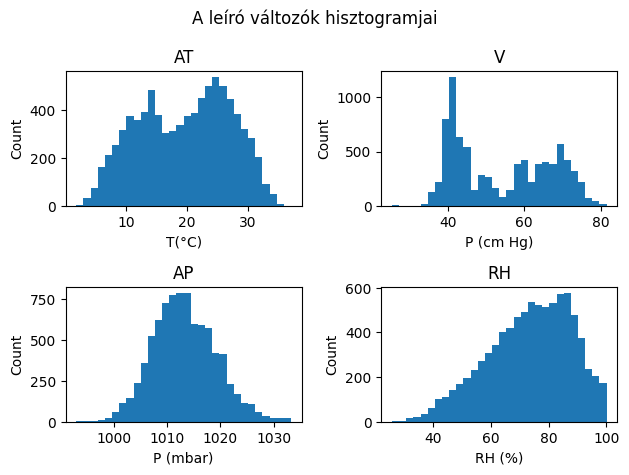

In [ ]:
fig, axes = plt.subplots(2, 2)
axes[0, 0].hist(df['AT'], bins =30)
axes[0, 0].set_xlabel('T(°C)')
axes[0, 0].set_ylabel('Count')
axes[0, 0].set_title('AT')

axes[0, 1].hist(df['V'], bins =30)
axes[0, 1].set_xlabel('P (cm Hg)')
axes[0, 1].set_ylabel('Count')
axes[0, 1].set_title('V')

axes[1, 0].hist(df['AP'], bins =30)
axes[1, 0].set_xlabel('P (mbar)')
axes[1, 0].set_ylabel('Count')
axes[1, 0].set_title('AP')

axes[1, 1].hist(df['RH'], bins =30)
axes[1, 1].set_xlabel('RH (%)')
axes[1, 1].set_ylabel('Count')
axes[1, 1].set_title('RH')
fig.suptitle('A leíró változók hisztogramjai')

fig.tight_layout()
fig.savefig('hist1.png')

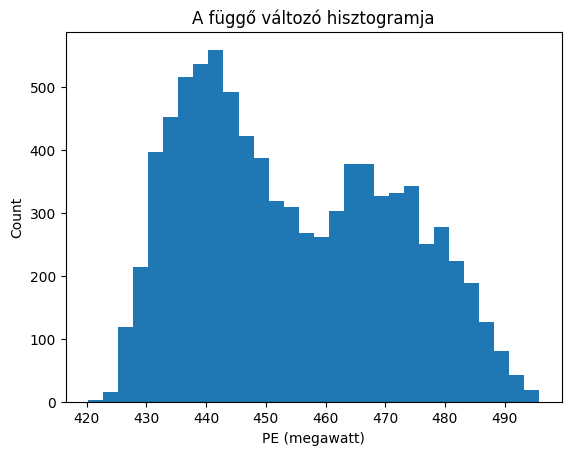

In [ ]:
plt.hist(df['PE'], 30)
plt.xlabel('PE (megawatt)')
plt.ylabel('Count')
plt.title('A függő változó hisztogramja')
plt.savefig('hist2.png')

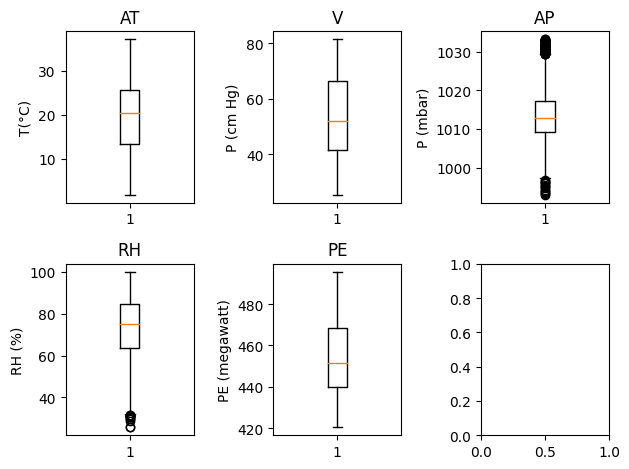

In [ ]:
fig, axes = plt.subplots(2, 3)
axes[0, 0].boxplot(x = df['AT'])
axes[0, 0].set_ylabel('T(°C)')
axes[0, 0].set_title('AT')

axes[0, 1].boxplot(df['V'])
axes[0, 1].set_ylabel('P (cm Hg)')
axes[0, 1].set_title('V')

axes[0, 2].boxplot(df['AP'])
axes[0, 2].set_ylabel('P (mbar)')
axes[0, 2].set_title('AP')

axes[1, 0].boxplot(df['RH'])
axes[1, 0].set_ylabel('RH (%)')
axes[1, 0].set_title('RH')

axes[1, 1].boxplot(df['PE'])
axes[1, 1].set_ylabel('PE (megawatt)')
axes[1, 1].set_title('PE')

fig.tight_layout()

fig.savefig('boxplot.png')

In [ ]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
IQR

UW = Q3 + 1.5*IQR
LW = Q1 - 1.5*IQR
print([UW, LW])

[AT      43.970
V      103.770
AP    1029.390
RH     116.905
PE     511.780
dtype: float64, AT     -4.830
V       4.410
AP    996.970
RH     31.505
PE    396.720
dtype: float64]


In [ ]:
((df < LW) | (df > UW)).any(axis=1)

0       False
1       False
2       False
3       False
4       False
        ...  
8563    False
8564    False
8565    False
8566    False
8567    False
Length: 8532, dtype: bool

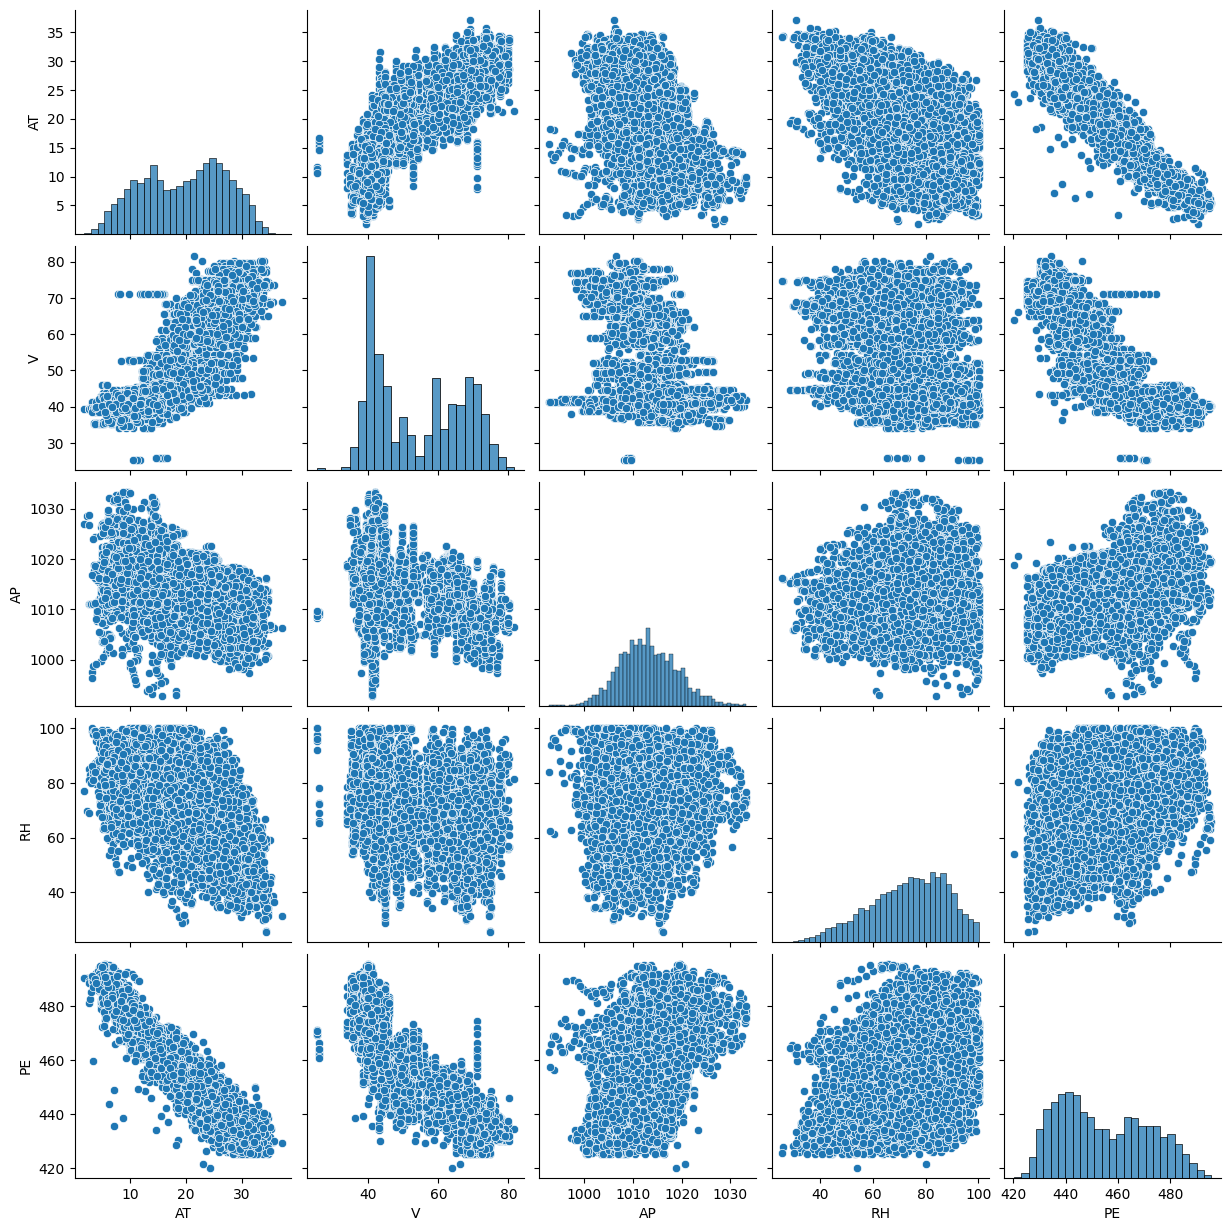

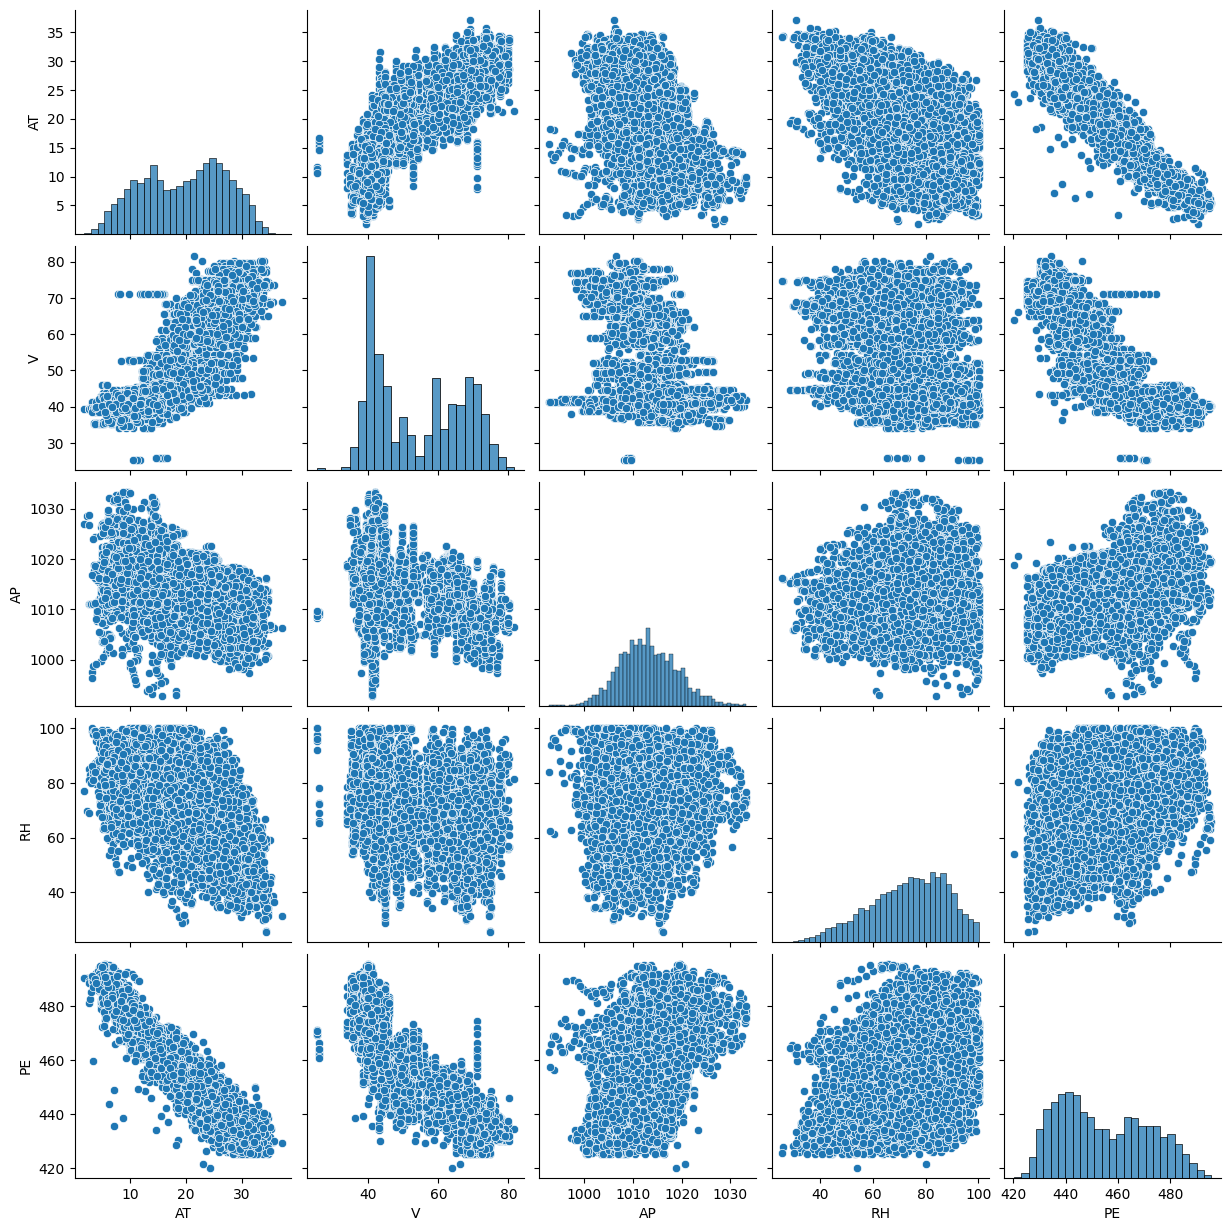

In [ ]:
sns.pairplot(df)
sns.pairplot(df).savefig('pairplot.png')

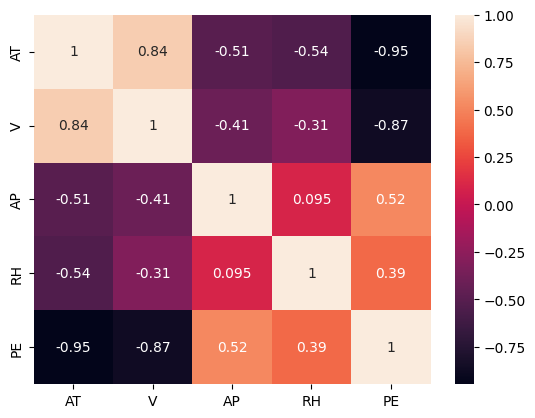

In [ ]:
corr = df.corr()
heatmap = sns.heatmap(corr, annot=True)
heatmap_fig = heatmap.get_figure()
heatmap_fig.savefig('heatmap.png')

In [ ]:
df.to_excel('train_modellhez.xlsx')